In [17]:
raw_text <- readLines("./data/korean/text_moon.txt", encoding = "UTF-8")

head(raw_text)

# 불필요 문자 제거
library(stringr)

text <- '가나다라뜛꽯꽓 1234 !@# this is test Structures... okok'

text.2 <- str_replace_all(string = text, pattern = "[^가-힣]", replacement = " ")

# 연속된 공백 제거
text.3 <- str_squish(text.2)

text.3

# 전처리 작업 한번에 하기
library(dplyr)
text.4 <- raw_text %>% 
        str_replace_all(pattern = "[^가-힣]", replacement = " ") %>%
        str_squish() %>%
        as_tibble()
            
#text.4




[1] "정권교체 하겠습니다!" ""                     "정치교체 하겠습니다!"
[4] ""                     "시대교체 하겠습니다!" ""

[1] "가나다라뜛꽯꽓"

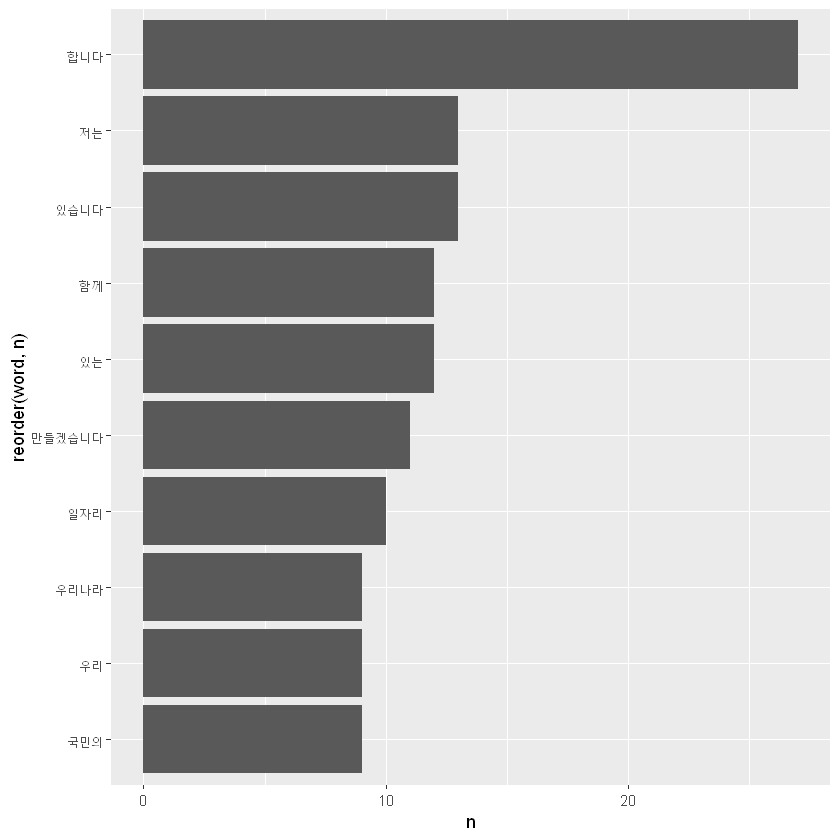

In [43]:
# 텍스트 토큰화

library(tidytext)

# 반드시 tibble 타입을 넣어줘야함
words <- text.4 %>%
        unnest_tokens(
            input = value
            , output = word
            , token = "words"
        )

#words

# 단어 빈도 구하기, 소팅 처리, 단어 1개 초과만 필터링 해서 이용, 상위 10개 추출
top10 <- words %>% count(word, sort = T) %>% filter(str_count(word) > 1) %>% head(10)

library(ggplot2)

ggplot(top10, aes(x = reorder(word, n), y = n)) +
    geom_col() +
    coord_flip()